# SWAHILI NEWS CLASSIFICATION

In [25]:
# Load the dataset

# Will clean the train dataset and test the model with the test dataset

import pandas as pd
import numpy as np

In [26]:
# Load the dataset

news = pd.read_csv('datasets/Train.csv')
news.head()

id                                            content  category
0     SW0   SERIKALI imesema haitakuwa tayari kuona amani...   Kitaifa
1     SW1   Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...  Biashara
2    SW10   SERIKALI imetoa miezi sita kwa taasisi zote z...   Kitaifa
3   SW100   KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   michezo
4  SW1000   WATANZANIA wamekumbushwa kusherehekea sikukuu...   Kitaifa

## Data Cleaning & EDA

In [27]:
# Will remove the id column

news = news.drop(columns=['id'], axis=1)
news.head()

content  category
0   SERIKALI imesema haitakuwa tayari kuona amani...   Kitaifa
1   Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...  Biashara
2   SERIKALI imetoa miezi sita kwa taasisi zote z...   Kitaifa
3   KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   michezo
4   WATANZANIA wamekumbushwa kusherehekea sikukuu...   Kitaifa

In [28]:
# Number of rows and columns
news.shape

(5151, 2)

<AxesSubplot:xlabel='category', ylabel='count'>

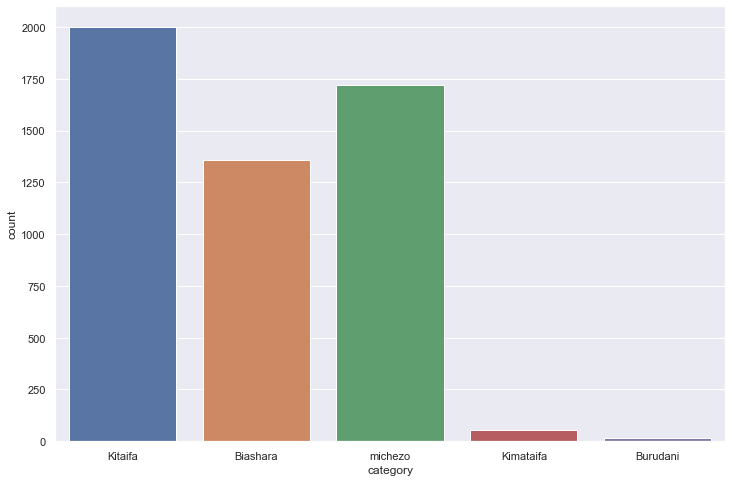

In [29]:
# Will vizualize the most common type of news category
import seaborn as sns
sns.set(rc = {'figure.figsize':(12, 8)})
sns.countplot(x = news['category'])

Due to lack of data, will only be predicting news articles in 'kitaifa', 'biashara' and 'michezo' categories

In [30]:
# Drop rows with values of 'kimataifa' and 'burudani'

categories = ['Kimataifa', 'Burudani']

news = news[news.category.isin(categories) == False]

news.head()

content  category
0   SERIKALI imesema haitakuwa tayari kuona amani...   Kitaifa
1   Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...  Biashara
2   SERIKALI imetoa miezi sita kwa taasisi zote z...   Kitaifa
3   KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   michezo
4   WATANZANIA wamekumbushwa kusherehekea sikukuu...   Kitaifa

In [31]:
news.shape

(5080, 2)

about 70 rows of data were dropped, which will be sufficient for our project

# NLP Preprocessing

#### Steps : 

- Lowercase
- Stopwords (will define them as they are in swahili)
- tokenization (splitting the sentenses into individual text)
- Removing punctuation marks


TBD

## 1. Change text to Lowercase

In [32]:
news['new'] = news['content'].str.lower()
news.head()

content  category  \
0   SERIKALI imesema haitakuwa tayari kuona amani...   Kitaifa   
1   Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...  Biashara   
2   SERIKALI imetoa miezi sita kwa taasisi zote z...   Kitaifa   
3   KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   michezo   
4   WATANZANIA wamekumbushwa kusherehekea sikukuu...   Kitaifa   

                                                 new  
0   serikali imesema haitakuwa tayari kuona amani...  
1   mkuu wa mkoa wa tabora, aggrey mwanri amesiti...  
2   serikali imetoa miezi sita kwa taasisi zote z...  
3   kampuni ya mchezo wa kubahatisha ya m-bet ime...  
4   watanzania wamekumbushwa kusherehekea sikukuu...

## 2. Removing stopwords

In [33]:
stopwords_swahili = ['akasema', 'alikuwa', 'alisema', 'baada', 'basi','bila', 'cha', 'chini', 'hadi', 'hapo', 'hata','hivyo', 'hiyo', 'huku', 'huo', 'ili',
'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila ', 'kima', 'kisha', 'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la', 'lakini', 'mara',
'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda', 'mwenye', 'na', 'naye', 'ndani', 'ng', 'ni', 'nini', 'pamoja', 'pia', 'sana', 'sasa', 'sauti', 'tafadhali', 'tena',
'tu', 'ule', 'vile', 'wa', 'wakati', 'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'za', 'zaidi', 'zake']
stopwords_swahili

['akasema',
 'alikuwa',
 'alisema',
 'baada',
 'basi',
 'bila',
 'cha',
 'chini',
 'hadi',
 'hapo',
 'hata',
 'hivyo',
 'hiyo',
 'huku',
 'huo',
 'ili',
 'ilikuwa',
 'juu',
 'kama',
 'karibu',
 'katika',
 'kila ',
 'kima',
 'kisha',
 'kubwa',
 'kutoka',
 'kuwa',
 'kwa',
 'kwamba',
 'kwenda',
 'kwenye',
 'la',
 'lakini',
 'mara',
 'mdogo',
 'mimi',
 'mkubwa',
 'mmoja',
 'moja',
 'muda',
 'mwenye',
 'na',
 'naye',
 'ndani',
 'ng',
 'ni',
 'nini',
 'pamoja',
 'pia',
 'sana',
 'sasa',
 'sauti',
 'tafadhali',
 'tena',
 'tu',
 'ule',
 'vile',
 'wa',
 'wakati',
 'wake',
 'walikuwa',
 'wao',
 'watu',
 'wengine',
 'wote',
 'ya',
 'yake',
 'yangu',
 'yao',
 'yeye',
 'yule',
 'za',
 'zaidi',
 'zake']

In [34]:
# Every word in that array should be removed in the column

# Will create a function that iterates through the text, removing present stopwords

def swahili_stops(text):
    no_stops = " ".join([word for word in text.split() if word not in stopwords_swahili])
    return no_stops

In [35]:
# Test
eg = 'ule mtu fulani amekaa kando ya kiti juu ya meza'

swahili_stops(eg)

'mtu fulani amekaa kando kiti meza'

In [36]:
news['new'] = news['new'].apply(lambda text : swahili_stops(text))
news['new']

0       serikali imesema haitakuwa tayari kuona amani ...
1       mkuu mkoa tabora, aggrey mwanri amesitisha lik...
2       serikali imetoa miezi sita taasisi zote umma a...
3       kampuni mchezo kubahatisha m-bet imeingia maku...
4       watanzania wamekumbushwa kusherehekea sikukuu ...
                              ...                        
5146    rais john magufuli ameendelea kung’ara siasa k...
5147    kampeni inayohimiza watafi ti kuandika upya hi...
5148    matukio mapya malaria kila 1,000 jamii, yamepu...
5149    imeelezwa hakuna sheria yoyote inayokataza taa...
5150    akizungumza kutiwa saini makubaliano hayo jana...
Name: new, Length: 5080, dtype: object

## 3. Tokenization

In [37]:
# Will import the natural language library which will help in tokenization
import nltk

tokenizer = nltk.word_tokenize

In [38]:
news['tokenized'] = news['new'].apply(tokenizer)
news.head()

content  category  \
0   SERIKALI imesema haitakuwa tayari kuona amani...   Kitaifa   
1   Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...  Biashara   
2   SERIKALI imetoa miezi sita kwa taasisi zote z...   Kitaifa   
3   KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   michezo   
4   WATANZANIA wamekumbushwa kusherehekea sikukuu...   Kitaifa   

                                                 new  \
0  serikali imesema haitakuwa tayari kuona amani ...   
1  mkuu mkoa tabora, aggrey mwanri amesitisha lik...   
2  serikali imetoa miezi sita taasisi zote umma a...   
3  kampuni mchezo kubahatisha m-bet imeingia maku...   
4  watanzania wamekumbushwa kusherehekea sikukuu ...   

                                           tokenized  
0  [serikali, imesema, haitakuwa, tayari, kuona, ...  
1  [mkuu, mkoa, tabora, ,, aggrey, mwanri, amesit...  
2  [serikali, imetoa, miezi, sita, taasisi, zote,...  
3  [kampuni, mchezo, kubahatisha, m-bet, imeingia...  
4  [watanzania, wamekumbushwa, kusherehekea, siku...

Before padding, will need to encode the categories

In [39]:
# Hot encode the category column
news = pd.get_dummies(news, columns=['category'])
news

content  \
0      SERIKALI imesema haitakuwa tayari kuona amani...   
1      Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...   
2      SERIKALI imetoa miezi sita kwa taasisi zote z...   
3      KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...   
4      WATANZANIA wamekumbushwa kusherehekea sikukuu...   
...                                                 ...   
5146   RAIS John Magufuli ameendelea kung’ara katika...   
5147   KAMPENI inayohimiza watafi ti kuandika upya h...   
5148   MATUKIO mapya ya malaria kwa kila watu 1,000 ...   
5149   IMEELEZWA kuwa hakuna sheria yoyote inayokata...   
5150   Akizungumza mara baada ya kutiwa saini kwa ma...   

                                                    new  \
0     serikali imesema haitakuwa tayari kuona amani ...   
1     mkuu mkoa tabora, aggrey mwanri amesitisha lik...   
2     serikali imetoa miezi sita taasisi zote umma a...   
3     kampuni mchezo kubahatisha m-bet imeingia maku...   
4     watanzania wamekumbushwa kusherehekea sikukuu ...   
...                                                 ...   
5146  rais john magufuli ameendelea kung’ara siasa k...   
5147  kampeni inayohimiza watafi ti kuandika upya hi...   
5148  matukio mapya malaria kila 1,000 jamii, yamepu...   
5149  imeelezwa hakuna sheria yoyote inayokataza taa...   
5150  akizungumza kutiwa saini makubaliano hayo jana...   

                                              tokenized  category_Biashara  \
0     [serikali, imesema, haitakuwa, tayari, kuona, ...                  0   
1     [mkuu, mkoa, tabora, ,, aggrey, mwanri, amesit...                  1   
2     [serikali, imetoa, miezi, sita, taasisi, zote,...                  0   
3     [kampuni, mchezo, kubahatisha, m-bet, imeingia...                  0   
4     [watanzania, wamekumbushwa, kusherehekea, siku...                  0   
...                                                 ...                ...   
5146  [rais, john, magufuli, ameendelea, kung, ’, ar...                  0   
5147  [kampeni, inayohimiza, watafi, ti, kuandika, u...                  0   
5148  [matukio, mapya, malaria, kila, 1,000, jamii, ...                  0   
5149  [imeelezwa, hakuna, sheria, yoyote, inayokataz...                  0   
5150  [akizungumza, kutiwa, saini, makubaliano, hayo...                  1   

      category_Kitaifa  category_michezo  
0                    1                 0  
1                    0                 0  
2                    1                 0  
3                    0                 1  
4                    1                 0  
...                ...               ...  
5146                 1                 0  
5147                 1                 0  
5148                 1                 0  
5149                 1                 0  
5150                 0                 0  

[5080 rows x 6 columns]

In [40]:
# Split into X and y
X = news['new']
y = news[['category_Biashara', 'category_Kitaifa', 'category_michezo']]

In [41]:
y

category_Biashara  category_Kitaifa  category_michezo
0                     0                 1                 0
1                     1                 0                 0
2                     0                 1                 0
3                     0                 0                 1
4                     0                 1                 0
...                 ...               ...               ...
5146                  0                 1                 0
5147                  0                 1                 0
5148                  0                 1                 0
5149                  0                 1                 0
5150                  1                 0                 0

[5080 rows x 3 columns]

In [42]:
X

0       serikali imesema haitakuwa tayari kuona amani ...
1       mkuu mkoa tabora, aggrey mwanri amesitisha lik...
2       serikali imetoa miezi sita taasisi zote umma a...
3       kampuni mchezo kubahatisha m-bet imeingia maku...
4       watanzania wamekumbushwa kusherehekea sikukuu ...
                              ...                        
5146    rais john magufuli ameendelea kung’ara siasa k...
5147    kampeni inayohimiza watafi ti kuandika upya hi...
5148    matukio mapya malaria kila 1,000 jamii, yamepu...
5149    imeelezwa hakuna sheria yoyote inayokataza taa...
5150    akizungumza kutiwa saini makubaliano hayo jana...
Name: new, Length: 5080, dtype: object

In [45]:
# Tokenizing the data in X
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
tokenize = Tokenizer(num_words = 3000)
tokenize.fit_on_texts(X)

sequence = tokenize.texts_to_sequences(X)

In [52]:
# Padding
padded_text = pad_sequences(sequence, maxlen = 100)
padded_text

array([[ 213,   55,  276, ...,  543, 1730,  546],
       [  42,   37,   81, ...,  116,  104,  394],
       [1374,   89,  196, ...,  197,   61,   33],
       ...,
       [ 681,   27,    5, ...,  118,  188, 2840],
       [ 746,  397, 1140, ...,    4,  259, 2893],
       [ 198,  170,   11, ...,   10,   21,  169]], dtype=int32)

In [53]:
len(padded_text)

5080

# Modeling using Tensor Flow